In [55]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import time
import pathlib
import numpy as np
import pandas as pd

In [76]:
def limit_data(data_dir, n):
    a = []
    for i in os.listdir(data_dir):
        if '.DS_Store' in i:
            continue
        for k, j in enumerate(os.listdir(data_dir + '/' + i)):
            if k >= n:
                continue
            a.append((f'{data_dir}/{i}/{j}', i))
    return pd.DataFrame(a, columns=['filename', 'class'])

training = {}
sizes = [100, 150, 200, 250, 300]

for i in range(5):
    path = '/Users/kilometers/Documents/GitHub/CS534/hw7/dataset/'

    data_dir = limit_data(path, sizes[i]/2)

    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
      tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu', padding="same"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu', padding="same"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu', padding="same"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding="same"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(4096, activation='relu'),
      tf.keras.layers.Dense(4096, activation='relu'),
      tf.keras.layers.Dense(output_class_units, activation='softmax')
    ])

    BATCH_SIZE = 3
    IMG_HEIGHT = 227
    IMG_WIDTH = 227

    image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    train_data_gen = image_generator.flow_from_dataframe(dataframe=data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         shuffle=True,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH))

    model.compile(optimizer='sgd', loss="categorical_crossentropy", metrics=['accuracy', 'mean_squared_error'])

    model.summary()

    training[str(sizes[i])] = model.fit(train_data_gen, steps_per_epoch=2, epochs=100)

Found 100 validated image filenames belonging to 2 classes.
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_85 (Bat  (None, 55, 55, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_86 (Conv2D)          (None, 27, 27, 256)       2973952   
                                                                 
 batch_normalization_86 (Bat  (None, 27, 27, 256)      1024      
 chNormalization)                                          

2/2 [==============================] - 2s 837ms/step - loss: 0.1364 - accuracy: 0.8333 - mean_squared_error: 0.0512
Epoch 41/100
2/2 [==============================] - 2s 901ms/step - loss: 1.3751 - accuracy: 0.6667 - mean_squared_error: 0.2376
Epoch 42/100
2/2 [==============================] - 2s 717ms/step - loss: 1.5267 - accuracy: 0.5000 - mean_squared_error: 0.4465
Epoch 43/100
2/2 [==============================] - 2s 876ms/step - loss: 0.5838 - accuracy: 0.8333 - mean_squared_error: 0.1573
Epoch 44/100
2/2 [==============================] - 2s 867ms/step - loss: 0.0036 - accuracy: 1.0000 - mean_squared_error: 4.5445e-05
Epoch 45/100
2/2 [==============================] - 2s 876ms/step - loss: 0.1007 - accuracy: 1.0000 - mean_squared_error: 0.0341 
Epoch 46/100
2/2 [==============================] - 2s 864ms/step - loss: 0.8403 - accuracy: 0.5000 - mean_squared_error: 0.3065
Epoch 47/100
2/2 [==============================] - 2s 798ms/step - loss: 0.2173 - accuracy: 0.8333 - mea

 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_90 (Bat  (None, 55, 55, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_91 (Conv2D)          (None, 27, 27, 256)       2973952   
                                                                 
 batch_normalization_91 (Bat  (None, 27, 27, 256)      1024      
 chNormalization)                                                
                                                                 
 conv2d_92 (Conv2D)          (None, 27, 27, 384)       885120    
          

2/2 [==============================] - 2s 810ms/step - loss: 0.5341 - accuracy: 0.8333 - mean_squared_error: 0.1534
Epoch 42/100
2/2 [==============================] - 2s 832ms/step - loss: 0.6825 - accuracy: 0.8333 - mean_squared_error: 0.1612
Epoch 43/100
2/2 [==============================] - 2s 851ms/step - loss: 0.0022 - accuracy: 1.0000 - mean_squared_error: 1.3371e-05
Epoch 44/100
2/2 [==============================] - 2s 850ms/step - loss: 2.6741 - accuracy: 0.3333 - mean_squared_error: 0.5554
Epoch 45/100
2/2 [==============================] - 2s 848ms/step - loss: 0.0324 - accuracy: 1.0000 - mean_squared_error: 0.0051 
Epoch 46/100
2/2 [==============================] - 2s 856ms/step - loss: 0.0289 - accuracy: 1.0000 - mean_squared_error: 0.0042
Epoch 47/100
2/2 [==============================] - 2s 838ms/step - loss: 0.0313 - accuracy: 1.0000 - mean_squared_error: 0.0044
Epoch 48/100
2/2 [==============================] - 2s 860ms/step - loss: 2.3587e-04 - accuracy: 1.0000 -

                                                                 
 batch_normalization_95 (Bat  (None, 55, 55, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_96 (Conv2D)          (None, 27, 27, 256)       2973952   
                                                                 
 batch_normalization_96 (Bat  (None, 27, 27, 256)      1024      
 chNormalization)                                                
                                                                 
 conv2d_97 (Conv2D)          (None, 27, 27, 384)       885120    
                                                                 
 batch_normalization_97 (Bat  (None, 27, 27, 384)      1536      
 chNormali

2/2 [==============================] - 2s 823ms/step - loss: 2.0264 - accuracy: 0.5000 - mean_squared_error: 0.4801
Epoch 44/100
2/2 [==============================] - 2s 886ms/step - loss: 0.0465 - accuracy: 1.0000 - mean_squared_error: 0.0037
Epoch 45/100
2/2 [==============================] - 2s 816ms/step - loss: 2.2479 - accuracy: 0.5000 - mean_squared_error: 0.4502
Epoch 46/100
2/2 [==============================] - 2s 831ms/step - loss: 0.9039 - accuracy: 0.5000 - mean_squared_error: 0.3107
Epoch 47/100
2/2 [==============================] - 2s 840ms/step - loss: 0.4614 - accuracy: 0.8333 - mean_squared_error: 0.1602
Epoch 48/100
2/2 [==============================] - 2s 844ms/step - loss: 0.8616 - accuracy: 0.6667 - mean_squared_error: 0.2836
Epoch 49/100
2/2 [==============================] - 2s 837ms/step - loss: 0.1223 - accuracy: 1.0000 - mean_squared_error: 0.0362
Epoch 50/100
2/2 [==============================] - 2s 1s/step - loss: 0.2766 - accuracy: 0.8333 - mean_square

 g2D)                                                            
                                                                 
 conv2d_101 (Conv2D)         (None, 27, 27, 256)       2973952   
                                                                 
 batch_normalization_101 (Ba  (None, 27, 27, 256)      1024      
 tchNormalization)                                               
                                                                 
 conv2d_102 (Conv2D)         (None, 27, 27, 384)       885120    
                                                                 
 batch_normalization_102 (Ba  (None, 27, 27, 384)      1536      
 tchNormalization)                                               
                                                                 
 conv2d_103 (Conv2D)         (None, 27, 27, 384)       1327488   
                                                                 
 batch_normalization_103 (Ba  (None, 27, 27, 384)      1536      
 tchNormal

Epoch 46/100
2/2 [==============================] - 2s 821ms/step - loss: 0.2717 - accuracy: 0.8333 - mean_squared_error: 0.1028
Epoch 47/100
2/2 [==============================] - 2s 835ms/step - loss: 0.7848 - accuracy: 0.8333 - mean_squared_error: 0.1689
Epoch 48/100
2/2 [==============================] - 2s 840ms/step - loss: 0.4424 - accuracy: 0.8333 - mean_squared_error: 0.1434
Epoch 49/100
2/2 [==============================] - 2s 851ms/step - loss: 0.2010 - accuracy: 0.8333 - mean_squared_error: 0.0566
Epoch 50/100
2/2 [==============================] - 2s 820ms/step - loss: 0.7916 - accuracy: 0.5000 - mean_squared_error: 0.2959
Epoch 51/100
2/2 [==============================] - 2s 807ms/step - loss: 1.4234 - accuracy: 0.3333 - mean_squared_error: 0.4808
Epoch 52/100
2/2 [==============================] - 2s 825ms/step - loss: 0.4861 - accuracy: 0.8333 - mean_squared_error: 0.1480
Epoch 53/100
2/2 [==============================] - 2s 837ms/step - loss: 0.2380 - accuracy: 0.83

                                                                 
 conv2d_107 (Conv2D)         (None, 27, 27, 384)       885120    
                                                                 
 batch_normalization_107 (Ba  (None, 27, 27, 384)      1536      
 tchNormalization)                                               
                                                                 
 conv2d_108 (Conv2D)         (None, 27, 27, 384)       1327488   
                                                                 
 batch_normalization_108 (Ba  (None, 27, 27, 384)      1536      
 tchNormalization)                                               
                                                                 
 conv2d_109 (Conv2D)         (None, 27, 27, 256)       884992    
                                                                 
 batch_normalization_109 (Ba  (None, 27, 27, 256)      1024      
 tchNormalization)                                               
          

2/2 [==============================] - 2s 875ms/step - loss: 0.8400 - accuracy: 0.8333 - mean_squared_error: 0.1781
Epoch 50/100
2/2 [==============================] - 2s 887ms/step - loss: 0.2537 - accuracy: 0.8333 - mean_squared_error: 0.0957
Epoch 51/100
2/2 [==============================] - 2s 918ms/step - loss: 0.0223 - accuracy: 1.0000 - mean_squared_error: 9.7429e-04
Epoch 52/100
2/2 [==============================] - 2s 980ms/step - loss: 1.2414 - accuracy: 0.6667 - mean_squared_error: 0.2587
Epoch 53/100
2/2 [==============================] - 2s 895ms/step - loss: 0.4616 - accuracy: 0.6667 - mean_squared_error: 0.1698
Epoch 54/100
2/2 [==============================] - 2s 860ms/step - loss: 0.4041 - accuracy: 0.8333 - mean_squared_error: 0.1370 
Epoch 55/100
2/2 [==============================] - 2s 963ms/step - loss: 0.0062 - accuracy: 1.0000 - mean_squared_error: 2.2278e-04
Epoch 56/100
2/2 [==============================] - 2s 1s/step - loss: 0.0233 - accuracy: 1.0000 - me

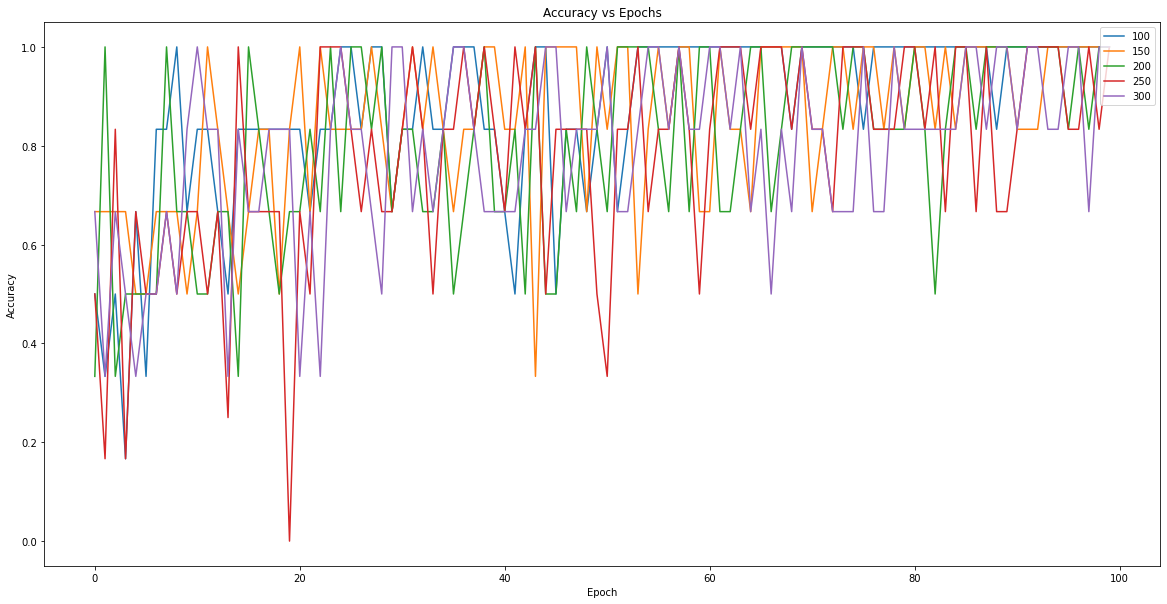

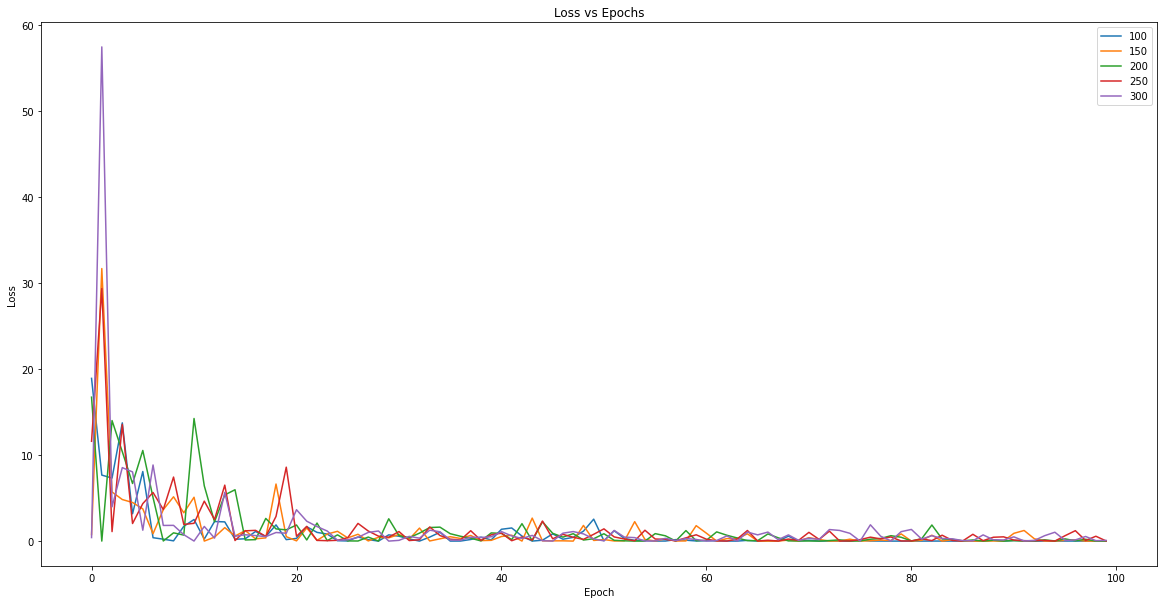

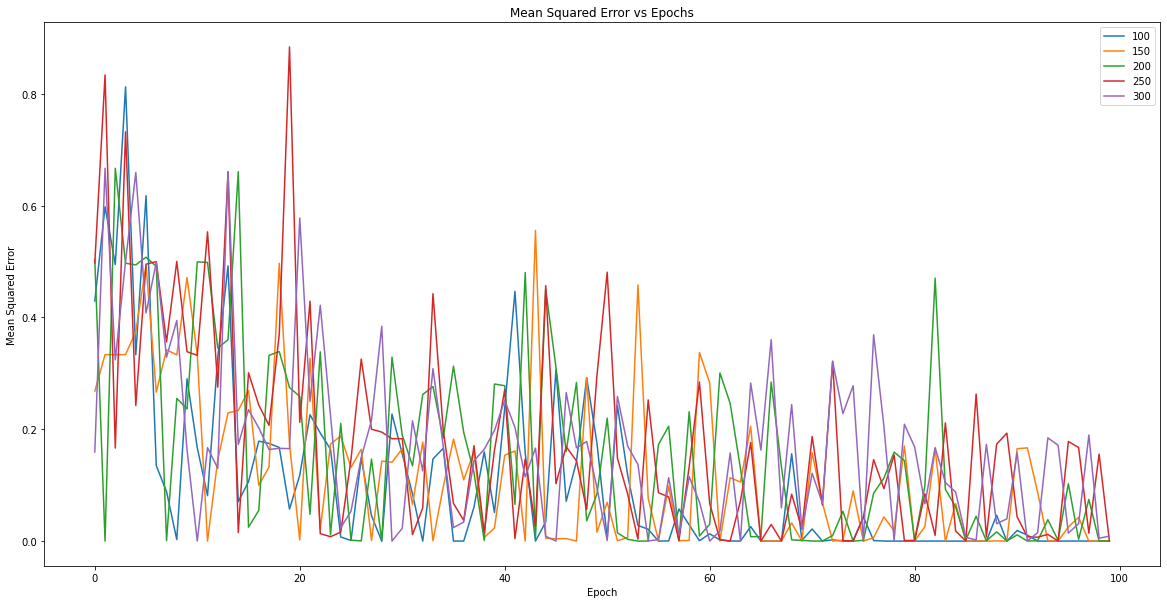

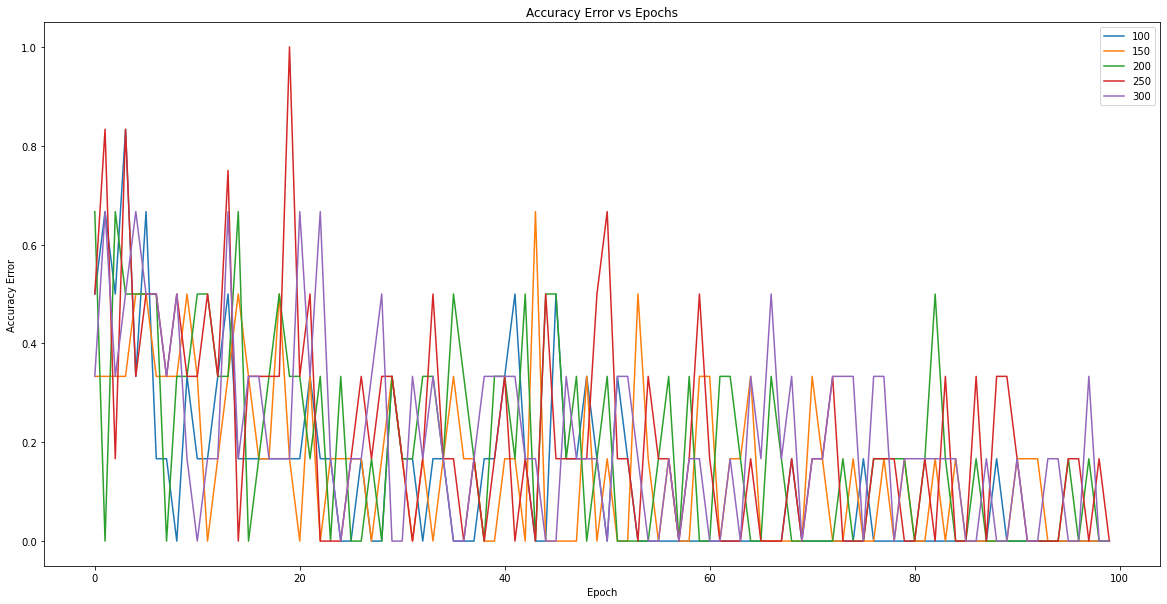

In [121]:
plt.rcParams['figure.figsize'] = [20, 10]

# PLOT 1
plt.plot(training['100'].history['accuracy'], label='100')
plt.plot(training['150'].history['accuracy'], label='150')
plt.plot(training['200'].history['accuracy'], label='200')
plt.plot(training['250'].history['accuracy'], label='250')
plt.plot(training['300'].history['accuracy'], label='300')

plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()

# PLOT 2
plt.plot(training['100'].history['loss'], label='100')
plt.plot(training['150'].history['loss'], label='150')
plt.plot(training['200'].history['loss'], label='200')
plt.plot(training['250'].history['loss'], label='250')
plt.plot(training['300'].history['loss'], label='300')

plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()

# PLOT 3
plt.plot(training['100'].history['mean_squared_error'], label='100')
plt.plot(training['150'].history['mean_squared_error'], label='150')
plt.plot(training['200'].history['mean_squared_error'], label='200')
plt.plot(training['250'].history['mean_squared_error'], label='250')
plt.plot(training['300'].history['mean_squared_error'], label='300')

plt.title('Mean Squared Error vs Epochs')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()

# PLOT 4
plt.plot([1-i for i in training['100'].history['accuracy']], label='100')
plt.plot([1-i for i in training['150'].history['accuracy']], label='150')
plt.plot([1-i for i in training['200'].history['accuracy']], label='200')
plt.plot([1-i for i in training['250'].history['accuracy']], label='250')
plt.plot([1-i for i in training['300'].history['accuracy']], label='300')

plt.title('Accuracy Error vs Epochs')
plt.ylabel('Accuracy Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')


plt.show()